# Price Prediction of Used Vehicles

<p>This is a regression modelling project as my prediction model will be based on Linear Regression.
I would like to predict the price of used vehicles based on their specifications. The specifications provided in the data set include:
•	Brand e.g. BMW, Mercedes.
•	Body e.g. Sedan, Wagon.
•	Mileage
•	Engine Volume
•	Engine Type e.g. Petrol, Diesel.
•	Registration
•	Year of manufacture
•	Model
</p>

<p> I will primarily focus on the 'Brand', 'Mileage' and 'Year' variables to use in prediction of the Price.
The rest are categorical variables which will be used in the creation of dummy variables to access the weight and bias of the regressors.</p>

### Importing the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

### Load the data

In [2]:
raw_data = pd.read_csv('1.01. Vehicle Specifications.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [3]:
# Exploring the descriptive statistics of the variables
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# Create a new dataframe without the 'Model' column as it is not useful
data = raw_data.drop('Model',axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
# Finding the number of missing values for each variable column
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# Create a new variable that is made up of the dataframe wihtout the rows with missing values
data_nomv = data.dropna(axis=0)

In [7]:
# Generation of descriptive statistics
data_nomv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<p> Notice the maximum and minimum values of each variable at each quartile
Print the Probability Distribution Functions for each variable.
The optimum PDF should be a Normal Distribution
</p>

### Exploring the PDFs of each feature

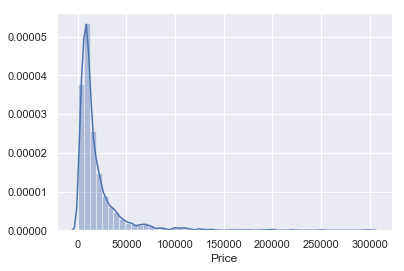

In [8]:
#Plotting a distribution graph of the 'Price' feature
sns.distplot(data_nomv['Price'])

### Dealing with outliers

In [24]:
# The Price PDF is Exponentially distributed
# The outliers will cause the regression to be inflated
#The 'Price' distribution plot shows that the feature is rightly skewed.
#dealing with outliers by removing the top 1% 'Price' variables that strech out the maximum 300,000
#keep the data below the 99th percentile
q = data_nomv['Price'].quantile(0.99)
data_1 = data_nomv[data_nomv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


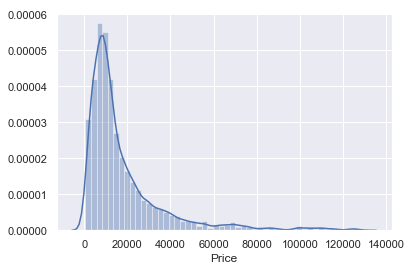

In [26]:
# Distribution plot that shows that the outliers have been reduced and the maximum price is now <= 130,000
#now with less outliers
sns.distplot(data_1['Price'])

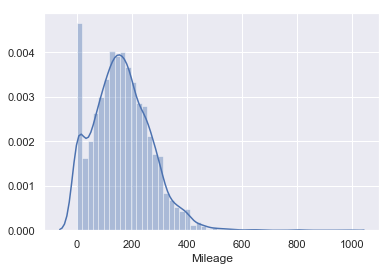

In [28]:
# Distribution plot for the 'Mileage' feature
sns.distplot(data_nomv['Mileage'])

In [29]:
# Identical to the Price distrribution
# Creating a variable 'r' to show the distribution of the Mileage below the 99th percentile
r = data_nomv['Mileage'].quantile(0.99)
data_2 = data_nomv[data_nomv['Mileage']<r]

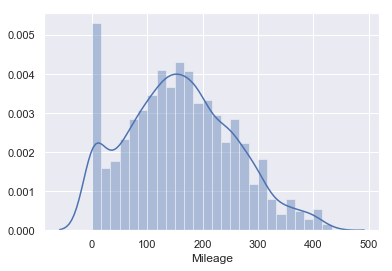

In [30]:
sns.distplot(data_2['Mileage'])

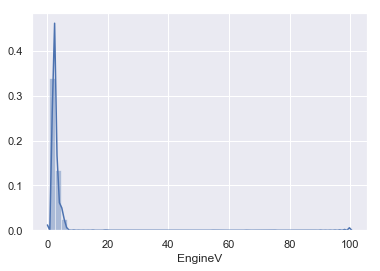

In [20]:
# Distribution plot of the Engine Volume
sns.distplot(data_nomv['EngineV'])

In [31]:
# using the natural domain of Engine Volumes, keep those that are logical and below 6.5
data_3 = data_2[data_2['EngineV']<6.5]

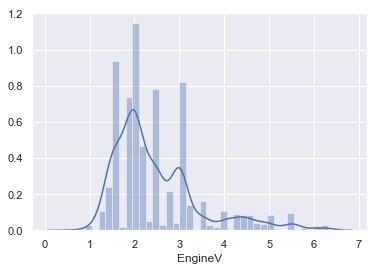

In [32]:
sns.distplot(data_3['EngineV'])

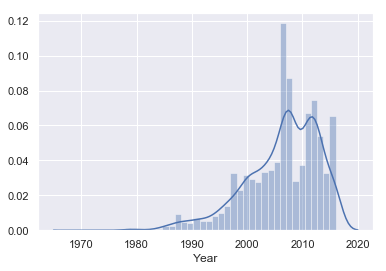

In [33]:
sns.distplot(data_nomv['Year'])

In [34]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

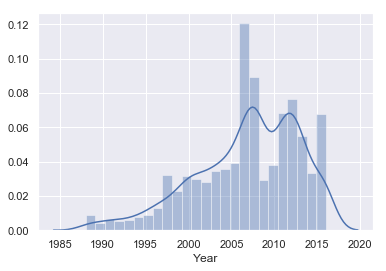

In [35]:
sns.distplot(data_4['Year'])

In [36]:
# create a dataframe for the cleaned data set and reset the index
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

<p> The Ordinary Least Square assumptions include:
    Linearity, No Endogeneity, Normality and Homoscedasticity, No autocorrelation and No multicollinearity
</p>

Text(0.5, 1.0, 'Price and Mileage')

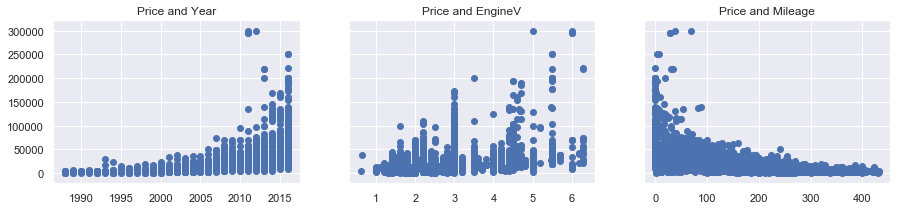

In [43]:
# Check for linearity in the continuous variables
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

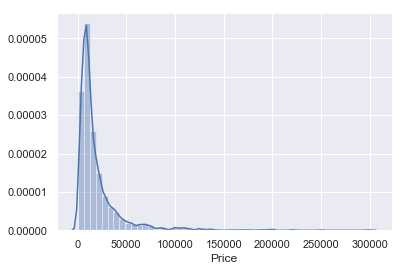

In [44]:
# Viewing the Price PDF once again to notice its exponential distribution
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [45]:
#transforming 'Price'to a linear variable using logarithm because of its exponential distribution
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,12.206068
6,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
7,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
8,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
9,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487


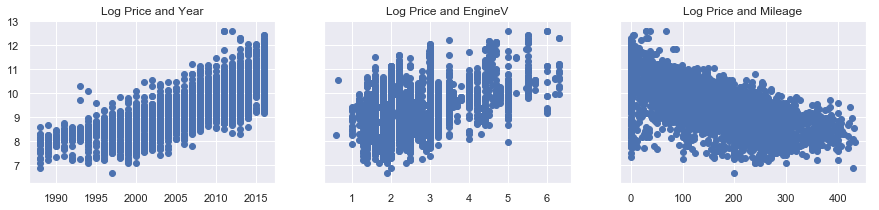

In [46]:
# Plotting the variables again using log_price to check for a linear pattern
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [47]:
#Dropping the 'Price' feature from the dataframe
data_cleaned.drop('Price', axis=1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Mercedes-Benz,crossover,0,5.50,Petrol,yes,2016,12.206068
6,Audi,vagon,200,2.70,Diesel,yes,2006,9.560997
7,Renault,vagon,193,1.50,Diesel,yes,2012,9.287209
8,Volkswagen,other,212,1.80,Gas,no,1999,7.244228
9,Renault,vagon,177,1.50,Diesel,yes,2011,9.388487


<p> The 'No Endogeneity' assumption is checked after the regression is created since it is based on the Residuals
The Normality and Homoscedasticity assumptions hold as we have already transformed the target variable('Price') to a linear variable using the log transformation</p>

<p>A check for 'No autocorrelation' is not necessary as the data is not derived from time series data or panel data
<br>Each row comes from a different customer hence no correlation</p>

### Multicolinearity

In [48]:
# USE A STATSMODEL METHOD CALLED VIF (Variance Inflation Factor)
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [49]:
#Import he module
#define the features you want to check for multicorrelation
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [50]:
vif

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


<p>VIF Values between 1 and 5 are considered acceptable.
<br>The feature 'Year' has the highest VIF hence it more likely correlated to the other variables and I shall now drop it from the dataframe</p>

In [51]:
 data_no_multicolinearity = data_cleaned.drop('Year', axis=1)

### Create dummy varables

In [52]:
# Spotting all categorical variables and creating dummies
# If we have N categorical variables, we have to create N-1 dummies so if all other dummies are zero, then we shall conclude that it is the category that isn't a dummy
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True)

In [53]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


 ## Rearrange a bit

In [54]:
#View the columns we have in the dataframe
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [55]:
#variable to hold all the column names and arrange them as I want with log_price coming first
cols = ['log_price','Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [56]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [59]:
#declare the inputs and targets
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price',axis=1)

In [60]:
#scale the data using StandardScaler
#create an instance of the StandardScaler class
#fit the inputs to the scaler instance
# We can scale the dummies as it has no impact on their predicitve power
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
#Create a variable to hold the scaled inputs after transformation
inputs_scaled = scaler.transform(inputs)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [62]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [82]:
#fit the regression with the x_train and y_train variables
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
# predictions using x_train
y_hat = reg.predict(x_train)

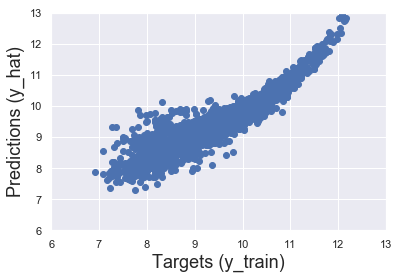

In [84]:
#plot the targets to the predictions
# plot y_hat to y_train
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

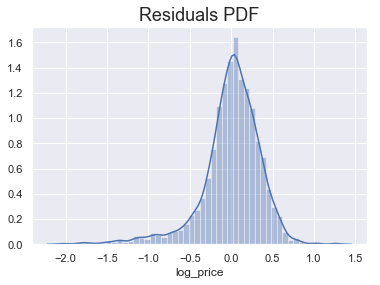

In [86]:
# plotting the residuals( estimates of the errors)
#the errors should be normally distributed
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [67]:
# calculating the R^2
reg.score(x_train, y_train)

0.8428830966081586

### Finding the weights and bias

In [68]:
# Calculating the Bias
reg.intercept_

9.437505454288988

In [69]:
#Calculating the Weights of the features
reg.coef_

array([ 0.3887111 , -0.29528314,  0.11935128,  0.01434711, -0.0100464 ,
       -0.09102691, -0.13537127, -0.02029752, -0.05885584, -0.11084386,
       -0.06730939, -0.13476019, -0.08023553, -0.1119562 , -0.07773218,
       -0.0197878 , -0.10300073,  0.27576398])

In [70]:
# create a summary table of the features and their weights
reg_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Price,0.388711
1,Mileage,-0.295283
2,EngineV,0.119351
3,Brand_BMW,0.014347
4,Brand_Mercedes-Benz,-0.010046
5,Brand_Mitsubishi,-0.091027
6,Brand_Renault,-0.135371
7,Brand_Toyota,-0.020298
8,Brand_Volkswagen,-0.058856
9,Body_hatch,-0.110844


In [71]:
#Return the unique categories of the ' Brand' feature in order of appearance
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)


### Testing

In [72]:
# Create a variable to store the predictions
y_hat_test = reg.predict(x_test)

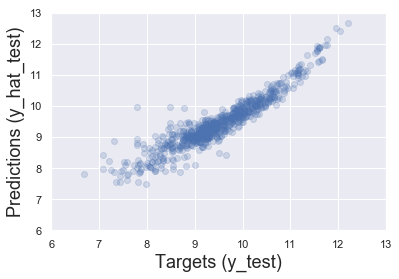

In [73]:
# plot the predictions to the targets
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [74]:
#Create a DataFrame to show the  performanceof the prediction
df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2827.723615
1,7788.694785
2,13000.204088
3,8281.476225
4,14745.558367


In [75]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,2827.723615,NaN
1,7788.694785,7900.0
2,13000.204088,NaN
3,8281.476225,NaN
4,14745.558367,NaN


In [76]:
# reset the indexing of the y_test DF
y_test = y_test.reset_index(drop=True)
y_test

0       7.495542
1       9.287301
2       9.609116
3       9.305651
4       9.740910
5       9.093807
6      11.580584
7       8.839277
8      10.463103
9       9.903238
10      8.948976
11      8.039157
12     10.768485
13      8.935904
14      8.242756
15      9.047821
16      9.035987
17      9.878170
18      9.546813
19      9.277999
20      9.852194
21      9.164820
22      9.287209
23     11.261601
24      8.517193
25      7.824046
26      8.389360
27     10.126471
28     10.214642
29      8.809863
         ...    
752    10.413313
753    10.184900
754     9.210240
755     9.011889
756    10.584056
757     8.639411
758     9.635608
759    10.338511
760     7.575585
761     8.853523
762    10.064756
763     8.411833
764     8.974618
765     9.179881
766     9.350102
767     7.824046
768     8.794825
769    10.064756
770     9.648531
771     9.510445
772     7.919356
773     9.994242
774    11.652687
775    11.308358
776     9.711116
777     7.575585
778     9.968104
779     9.5104

In [77]:
df_pf

,Prediction,Target
0,2827.723615,NaN
1,7788.694785,7900.0
2,13000.204088,NaN
3,8281.476225,NaN
4,14745.558367,NaN
5,8834.614742,199999.0
6,89409.164395,NaN
7,6275.831015,NaN
8,21126.384225,1400.0
9,11183.206952,NaN


In [78]:
# Overwriting the log in the y_test targets
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,2827.723615,1800.0
1,7788.694785,10800.0
2,13000.204088,14900.0
3,8281.476225,11000.0
4,14745.558367,16999.0


In [79]:
# Create a column for the residuals
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
#Create a column for the absolute residual percentage
df_pf['Residual%'] = np.absolute(df_pf['Residual'])/df_pf['Target']*100
df_pf.head()

,Prediction,Target,Residual,Residual%
0,2827.723615,1800.0,-1027.723615,57.095756
1,7788.694785,10800.0,3011.305215,27.882456
2,13000.204088,14900.0,1899.795912,12.750308
3,8281.476225,11000.0,2718.523775,24.713853
4,14745.558367,16999.0,2253.441633,13.256319


In [80]:
df_pf.describe()

,Prediction,Target,Residual,Residual%
count,782.000000,782.000000,782.000000,782.000000
mean,21654.177373,20717.216803,-936.960570,26.436818
std,52272.717720,25654.851301,34034.532392,43.700917
min,1762.110578,800.000000,-729950.759153,0.054431
25%,7880.525035,7500.000000,-984.548171,8.692861
50%,11566.792225,12500.000000,659.779060,18.247902
75%,20302.221892,23324.750000,3605.496160,30.748517
max,979949.759153,249999.000000,25592.022301,780.176442


<p><em>From the descriptive statistics of the data frame;

The minimum difference in percentages is 0.06%, so the output was spot on. The maximum difference in percentages however is pretty off mark.<br> Apart from the minimums and maximums, there are the percentiles. All of these tell us that for most of our predictions,
we got relatively close at this point.</p>

In [87]:
# sorting df_pf by difference in percentages using the sort values method 
df_pf.sort_values(by=['Residual%'])

,Prediction,Target,Residual,Residual%
40,4152.258895,4150.0,-2.258895,0.054431
287,70037.825344,69999.0,-38.825344,0.055466
131,25577.134285,25555.0,-22.134285,0.086614
334,21973.668265,22000.0,26.331735,0.119690
347,18828.767911,18800.0,-28.767911,0.153021
372,10879.791230,10900.0,20.208770,0.185402
493,72159.869823,71999.0,-160.869823,0.223433
449,8779.804801,8800.0,20.195199,0.229491
695,12432.853978,12400.0,-32.853978,0.264951
602,12735.674842,12700.0,-35.674842,0.280904


## Conclusion

<p> As we know our model is using the mileage, engine volume, brand, registration and body type to predict 
the price of a used car.
On average it is pretty decent at predicting the price for the last samples though it is an important
note that some residuals for these outliers are negative.Therefore their predictions are higher than the targets.
An explanation may be that we are missing an important factor which drives the price of a used car lower.
It may be the 'Model' of the car which we removed at the beginning of the analysis, but it may also be that
the car was damaged in some way.
A piece of information we did not initially have.
<br>
The model has made some good Price predictions but it not outstanding and may need further optimization</p>